In [22]:
import pandas as pd
import numpy as np
import json

file_names = []

for i in range(1,29):
    file_names.append(f"hmtimes{i}.csv")
file_names

['hmtimes1.csv',
 'hmtimes2.csv',
 'hmtimes3.csv',
 'hmtimes4.csv',
 'hmtimes5.csv',
 'hmtimes6.csv',
 'hmtimes7.csv',
 'hmtimes8.csv',
 'hmtimes9.csv',
 'hmtimes10.csv',
 'hmtimes11.csv',
 'hmtimes12.csv',
 'hmtimes13.csv',
 'hmtimes14.csv',
 'hmtimes15.csv',
 'hmtimes16.csv',
 'hmtimes17.csv',
 'hmtimes18.csv',
 'hmtimes19.csv',
 'hmtimes20.csv',
 'hmtimes21.csv',
 'hmtimes22.csv',
 'hmtimes23.csv',
 'hmtimes24.csv',
 'hmtimes25.csv',
 'hmtimes26.csv',
 'hmtimes27.csv',
 'hmtimes28.csv']

In [23]:
dfs=[]
for file_name in file_names:
    try:
        df = pd.read_csv(file_name, encoding='utf-16-le', sep=';')
        dfs.append(df)
    except:
        pass

In [24]:
df = pd.concat(dfs, ignore_index=True)
df["solvable"]=df["solvable"].astype(bool)
df["hasMultipleResults"] = df["hasMultipleResults"].astype(bool)
df["easilySolvable"] = df["easilySolvable"].astype(bool)
df

,elapsedMs,solvable,hasMultipleResults,easilySolvable,cells,cellsSolved,cellsHuman
0,53.6706,True,True,False,"[-1,-1,-1,-1,-1,-1,9,2,-1,-1,-1,-1,-1,-1,9,-1,...","[1,3,4,5,6,7,9,2,8,2,6,7,4,8,9,3,1,5,5,8,9,1,2...","[1,-1,-1,-1,-1,-1,9,2,-1,2,-1,-1,-1,-1,9,-1,1,..."
1,37.0400,True,True,False,"[-1,-1,2,5,-1,6,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...","[1,8,2,5,3,6,9,7,4,5,6,7,1,9,4,2,3,8,3,9,4,7,2...","[1,-1,2,5,-1,6,-1,-1,4,5,-1,7,-1,-1,4,-1,-1,-1..."
2,26.0913,True,True,False,"[-1,6,-1,-1,-1,-1,-1,-1,7,-1,-1,-1,-1,-1,-1,-1...","[1,6,8,2,3,4,5,9,7,9,2,7,1,6,5,8,3,4,4,5,3,7,9...","[-1,6,-1,-1,3,-1,-1,-1,7,-1,-1,-1,-1,6,-1,-1,3..."
3,12.8005,True,True,False,"[-1,-1,3,-1,-1,-1,-1,-1,-1,2,-1,7,-1,8,3,-1,9,...","[4,6,3,5,9,7,2,8,1,2,5,7,1,8,3,6,9,4,9,8,1,6,2...","[-1,6,3,5,-1,7,2,8,1,2,5,7,1,8,3,6,9,4,-1,8,1,..."
4,22.5629,True,False,True,"[-1,-1,2,-1,6,8,5,-1,-1,3,-1,-1,2,-1,5,-1,-1,9...","[4,9,2,3,6,8,5,1,7,3,6,1,2,7,5,4,8,9,5,7,8,1,4...","[4,9,2,3,6,8,5,1,7,3,6,1,2,7,5,4,8,9,5,7,8,1,4..."
...,...,...,...,...,...,...,...
1780,16.4503,True,True,False,"[-1,-1,1,5,6,8,-1,-1,-1,-1,4,5,2,7,9,-1,1,8,-1...","[2,9,1,5,6,8,3,4,7,3,4,5,2,7,9,6,1,8,6,8,7,1,4...","[-1,-1,1,5,6,8,-1,-1,-1,-1,4,5,2,7,9,-1,1,8,-1..."
1781,31683.0769,True,True,False,"[-1,-1,-1,-1,-1,5,-1,9,-1,2,-1,-1,-1,-1,7,-1,4...","[1,3,6,2,4,5,7,9,8,2,9,8,6,1,7,5,4,3,5,4,7,3,9...","[-1,-1,-1,2,4,5,-1,9,8,2,9,8,6,1,7,5,4,3,5,4,-..."
1782,214123.4804,False,False,False,"[2,9,-1,-1,-1,-1,-1,8,-1,5,-1,-1,-1,-1,-1,-1,-...","[2,9,-1,-1,-1,-1,-1,8,-1,5,-1,-1,-1,-1,-1,-1,-...",[]
1783,3.8170,True,True,False,"[-1,2,-1,-1,-1,9,-1,7,-1,-1,-1,-1,-1,7,-1,2,-1...","[1,2,4,3,5,9,6,7,8,3,5,6,4,7,8,2,1,9,8,7,9,1,2...","[1,2,-1,-1,-1,9,-1,7,-1,-1,-1,-1,-1,7,8,2,1,9,..."


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1785 entries, 0 to 1784
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   elapsedMs           1785 non-null   float64
 1   solvable            1785 non-null   bool   
 2   hasMultipleResults  1785 non-null   bool   
 3   easilySolvable      1785 non-null   bool   
 4   cells               1785 non-null   object 
 5   cellsSolved         1785 non-null   object 
 6   cellsHuman          1785 non-null   object 
dtypes: bool(3), float64(1), object(3)
memory usage: 61.1+ KB


In [26]:
df["elapsedMs"].describe()

count    1.785000e+03
mean     9.706461e+04
std      6.314685e+05
min      2.080000e-02
25%      9.045600e+00
50%      3.102380e+01
75%      8.507228e+02
max      1.336062e+07
Name: elapsedMs, dtype: float64

In [27]:
np.median(df["elapsedMs"])

31.0238

<Axes: >

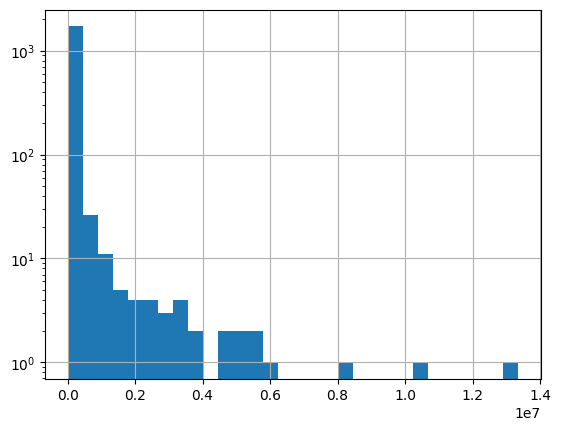

In [28]:
df["elapsedMs"].hist(bins=30, log=True)

<Axes: xlabel='solvable'>

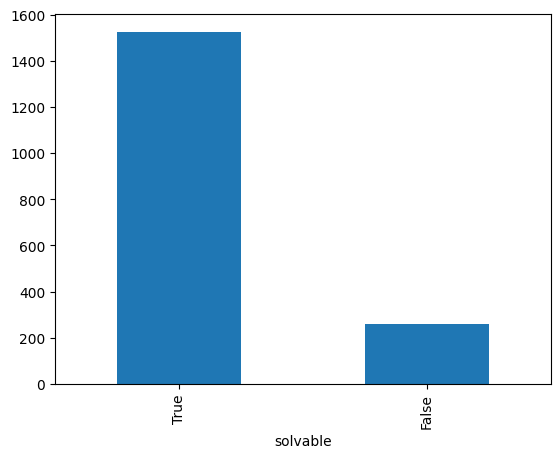

In [29]:
df["solvable"].value_counts().plot(kind="bar")

<Axes: xlabel='hasMultipleResults'>

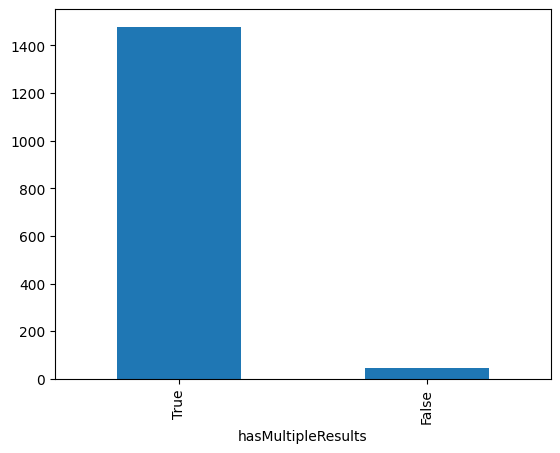

In [30]:
df[df['solvable']]["hasMultipleResults"].value_counts().plot(kind="bar")

<Axes: xlabel='easilySolvable'>

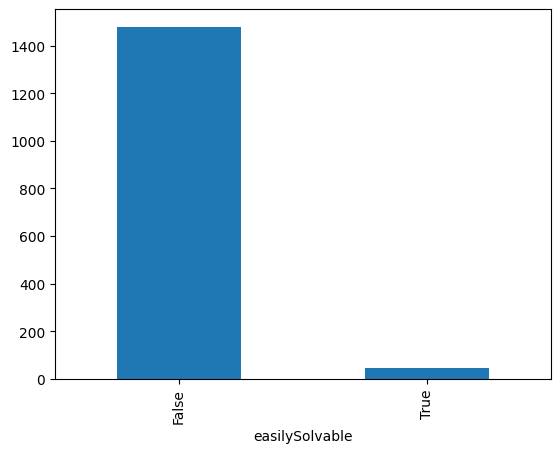

In [31]:
df[df['solvable']]["easilySolvable"].value_counts().plot(kind="bar")

<Axes: xlabel='easilySolvable'>

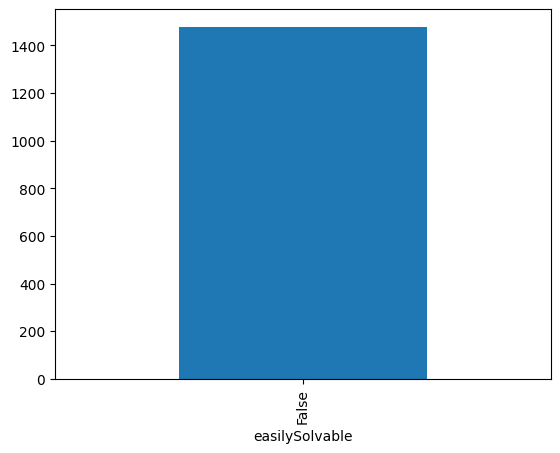

In [32]:
df[df['hasMultipleResults']]["easilySolvable"].value_counts().plot(kind="bar")

In [33]:
df[df["easilySolvable"]]

,elapsedMs,solvable,hasMultipleResults,easilySolvable,cells,cellsSolved,cellsHuman
4,22.5629,True,False,True,"[-1,-1,2,-1,6,8,5,-1,-1,3,-1,-1,2,-1,5,-1,-1,9...","[4,9,2,3,6,8,5,1,7,3,6,1,2,7,5,4,8,9,5,7,8,1,4...","[4,9,2,3,6,8,5,1,7,3,6,1,2,7,5,4,8,9,5,7,8,1,4..."
100,15.1762,True,False,True,"[-1,-1,-1,-1,-1,6,-1,9,-1,1,-1,4,-1,8,-1,7,3,-...","[2,5,3,4,7,6,1,9,8,1,6,4,5,8,9,7,3,2,8,9,7,3,2...","[2,5,3,4,7,6,1,9,8,1,6,4,5,8,9,7,3,2,8,9,7,3,2..."
125,10507.9934,True,False,True,"[2,9,3,-1,-1,7,-1,4,-1,-1,-1,4,-1,8,9,3,-1,-1,...","[2,9,3,1,6,7,5,4,8,6,1,4,5,8,9,3,2,7,5,8,7,4,3...","[2,9,3,1,6,7,5,4,8,6,1,4,5,8,9,3,2,7,5,8,7,4,3..."
180,741.3186,True,False,True,"[1,-1,5,-1,7,-1,-1,-1,9,-1,6,-1,-1,-1,1,7,-1,8...","[1,3,5,2,7,8,6,4,9,2,6,9,4,5,1,7,3,8,4,7,8,3,9...","[1,3,5,2,7,8,6,4,9,2,6,9,4,5,1,7,3,8,4,7,8,3,9..."
186,20.8038,True,False,True,"[3,-1,4,1,-1,-1,-1,7,-1,9,5,-1,-1,-1,7,-1,1,-1...","[3,6,4,1,2,5,8,7,9,9,5,8,3,6,7,2,1,4,2,1,7,4,8...","[3,6,4,1,2,5,8,7,9,9,5,8,3,6,7,2,1,4,2,1,7,4,8..."
212,34.7388,True,False,True,"[-1,-1,-1,-1,-1,7,6,-1,-1,-1,7,-1,2,-1,-1,5,-1...","[2,4,3,1,5,7,6,8,9,6,7,9,2,3,8,5,4,1,5,8,1,4,6...","[2,4,3,1,5,7,6,8,9,6,7,9,2,3,8,5,4,1,5,8,1,4,6..."
233,9.8775,True,False,True,"[-1,9,1,2,-1,4,-1,5,7,-1,-1,-1,-1,9,-1,1,4,-1,...","[8,9,1,2,3,4,6,5,7,5,2,6,7,9,8,1,4,3,4,7,3,5,1...","[8,9,1,2,3,4,6,5,7,5,2,6,7,9,8,1,4,3,4,7,3,5,1..."
325,13.5736,True,False,True,"[-1,-1,-1,-1,-1,8,6,-1,-1,-1,2,-1,1,-1,-1,-1,5...","[1,4,5,2,3,8,6,9,7,3,2,7,1,6,9,4,5,8,8,9,6,5,7...","[1,4,5,2,3,8,6,9,7,3,2,7,1,6,9,4,5,8,8,9,6,5,7..."
380,50.1799,True,False,True,"[1,-1,-1,-1,4,-1,5,-1,-1,3,-1,8,-1,2,-1,7,1,-1...","[1,7,2,3,4,8,5,9,6,3,5,8,6,2,9,7,1,4,4,6,9,1,5...","[1,7,2,3,4,8,5,9,6,3,5,8,6,2,9,7,1,4,4,6,9,1,5..."
458,74088.3780,True,False,True,"[2,5,4,6,-1,-1,7,-1,-1,1,-1,-1,2,5,-1,-1,-1,8,...","[2,5,4,6,8,9,7,3,1,1,9,7,2,5,3,4,6,8,3,8,6,4,1...","[2,5,4,6,8,9,7,3,1,1,9,7,2,5,3,4,6,8,3,8,6,4,1..."


In [34]:

np.matrix([json.loads(df.loc[4]["cells"])[i:i+9] for i in range(0, 81, 9)]), np.matrix([json.loads(df.loc[4]["cellsHuman"])[i:i+9] for i in range(0, 81, 9)]), np.matrix([json.loads(df.loc[4]["cellsSolved"])[i:i+9] for i in range(0, 81, 9)])

(matrix([[-1, -1,  2, -1,  6,  8,  5, -1, -1],
         [ 3, -1, -1,  2, -1,  5, -1, -1,  9],
         [-1,  7, -1, -1, -1,  9,  3, -1,  6],
         [ 7,  5,  3, -1, -1,  4,  8,  6, -1],
         [ 1, -1,  6, -1, -1,  3,  9, -1, -1],
         [-1, -1, -1,  6,  8, -1,  7, -1, -1],
         [-1, -1,  7, -1, -1, -1, -1, -1, -1],
         [-1, -1, -1,  4,  9, -1,  6, -1,  8],
         [-1, -1,  9, -1, -1, -1, -1, -1,  5]]),
 matrix([[4, 9, 2, 3, 6, 8, 5, 1, 7],
         [3, 6, 1, 2, 7, 5, 4, 8, 9],
         [5, 7, 8, 1, 4, 9, 3, 2, 6],
         [7, 5, 3, 9, 2, 4, 8, 6, 1],
         [1, 8, 6, 7, 5, 3, 9, 4, 2],
         [9, 2, 4, 6, 8, 1, 7, 5, 3],
         [8, 3, 7, 5, 1, 6, 2, 9, 4],
         [2, 1, 5, 4, 9, 7, 6, 3, 8],
         [6, 4, 9, 8, 3, 2, 1, 7, 5]]),
 matrix([[4, 9, 2, 3, 6, 8, 5, 1, 7],
         [3, 6, 1, 2, 7, 5, 4, 8, 9],
         [5, 7, 8, 1, 4, 9, 3, 2, 6],
         [7, 5, 3, 9, 2, 4, 8, 6, 1],
         [1, 8, 6, 7, 5, 3, 9, 4, 2],
         [9, 2, 4, 6, 8, 1, 7, 5, 3],
   

In [35]:
json.loads(df.loc[4]["cells"])

[-1,
 -1,
 2,
 -1,
 6,
 8,
 5,
 -1,
 -1,
 3,
 -1,
 -1,
 2,
 -1,
 5,
 -1,
 -1,
 9,
 -1,
 7,
 -1,
 -1,
 -1,
 9,
 3,
 -1,
 6,
 7,
 5,
 3,
 -1,
 -1,
 4,
 8,
 6,
 -1,
 1,
 -1,
 6,
 -1,
 -1,
 3,
 9,
 -1,
 -1,
 -1,
 -1,
 -1,
 6,
 8,
 -1,
 7,
 -1,
 -1,
 -1,
 -1,
 7,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 4,
 9,
 -1,
 6,
 -1,
 8,
 -1,
 -1,
 9,
 -1,
 -1,
 -1,
 -1,
 -1,
 5]

In [36]:
df_easily_solvable = df[df["easilySolvable"]]
df_easily_solvable

,elapsedMs,solvable,hasMultipleResults,easilySolvable,cells,cellsSolved,cellsHuman
4,22.5629,True,False,True,"[-1,-1,2,-1,6,8,5,-1,-1,3,-1,-1,2,-1,5,-1,-1,9...","[4,9,2,3,6,8,5,1,7,3,6,1,2,7,5,4,8,9,5,7,8,1,4...","[4,9,2,3,6,8,5,1,7,3,6,1,2,7,5,4,8,9,5,7,8,1,4..."
100,15.1762,True,False,True,"[-1,-1,-1,-1,-1,6,-1,9,-1,1,-1,4,-1,8,-1,7,3,-...","[2,5,3,4,7,6,1,9,8,1,6,4,5,8,9,7,3,2,8,9,7,3,2...","[2,5,3,4,7,6,1,9,8,1,6,4,5,8,9,7,3,2,8,9,7,3,2..."
125,10507.9934,True,False,True,"[2,9,3,-1,-1,7,-1,4,-1,-1,-1,4,-1,8,9,3,-1,-1,...","[2,9,3,1,6,7,5,4,8,6,1,4,5,8,9,3,2,7,5,8,7,4,3...","[2,9,3,1,6,7,5,4,8,6,1,4,5,8,9,3,2,7,5,8,7,4,3..."
180,741.3186,True,False,True,"[1,-1,5,-1,7,-1,-1,-1,9,-1,6,-1,-1,-1,1,7,-1,8...","[1,3,5,2,7,8,6,4,9,2,6,9,4,5,1,7,3,8,4,7,8,3,9...","[1,3,5,2,7,8,6,4,9,2,6,9,4,5,1,7,3,8,4,7,8,3,9..."
186,20.8038,True,False,True,"[3,-1,4,1,-1,-1,-1,7,-1,9,5,-1,-1,-1,7,-1,1,-1...","[3,6,4,1,2,5,8,7,9,9,5,8,3,6,7,2,1,4,2,1,7,4,8...","[3,6,4,1,2,5,8,7,9,9,5,8,3,6,7,2,1,4,2,1,7,4,8..."
212,34.7388,True,False,True,"[-1,-1,-1,-1,-1,7,6,-1,-1,-1,7,-1,2,-1,-1,5,-1...","[2,4,3,1,5,7,6,8,9,6,7,9,2,3,8,5,4,1,5,8,1,4,6...","[2,4,3,1,5,7,6,8,9,6,7,9,2,3,8,5,4,1,5,8,1,4,6..."
233,9.8775,True,False,True,"[-1,9,1,2,-1,4,-1,5,7,-1,-1,-1,-1,9,-1,1,4,-1,...","[8,9,1,2,3,4,6,5,7,5,2,6,7,9,8,1,4,3,4,7,3,5,1...","[8,9,1,2,3,4,6,5,7,5,2,6,7,9,8,1,4,3,4,7,3,5,1..."
325,13.5736,True,False,True,"[-1,-1,-1,-1,-1,8,6,-1,-1,-1,2,-1,1,-1,-1,-1,5...","[1,4,5,2,3,8,6,9,7,3,2,7,1,6,9,4,5,8,8,9,6,5,7...","[1,4,5,2,3,8,6,9,7,3,2,7,1,6,9,4,5,8,8,9,6,5,7..."
380,50.1799,True,False,True,"[1,-1,-1,-1,4,-1,5,-1,-1,3,-1,8,-1,2,-1,7,1,-1...","[1,7,2,3,4,8,5,9,6,3,5,8,6,2,9,7,1,4,4,6,9,1,5...","[1,7,2,3,4,8,5,9,6,3,5,8,6,2,9,7,1,4,4,6,9,1,5..."
458,74088.3780,True,False,True,"[2,5,4,6,-1,-1,7,-1,-1,1,-1,-1,2,5,-1,-1,-1,8,...","[2,5,4,6,8,9,7,3,1,1,9,7,2,5,3,4,6,8,3,8,6,4,1...","[2,5,4,6,8,9,7,3,1,1,9,7,2,5,3,4,6,8,3,8,6,4,1..."


In [37]:
easily_solvable_sudokus =  list(map(json.loads,df_easily_solvable["cells"].values))
easily_solvable_sudokus

[[-1,
  -1,
  2,
  -1,
  6,
  8,
  5,
  -1,
  -1,
  3,
  -1,
  -1,
  2,
  -1,
  5,
  -1,
  -1,
  9,
  -1,
  7,
  -1,
  -1,
  -1,
  9,
  3,
  -1,
  6,
  7,
  5,
  3,
  -1,
  -1,
  4,
  8,
  6,
  -1,
  1,
  -1,
  6,
  -1,
  -1,
  3,
  9,
  -1,
  -1,
  -1,
  -1,
  -1,
  6,
  8,
  -1,
  7,
  -1,
  -1,
  -1,
  -1,
  7,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  4,
  9,
  -1,
  6,
  -1,
  8,
  -1,
  -1,
  9,
  -1,
  -1,
  -1,
  -1,
  -1,
  5],
 [-1,
  -1,
  -1,
  -1,
  -1,
  6,
  -1,
  9,
  -1,
  1,
  -1,
  4,
  -1,
  8,
  -1,
  7,
  3,
  -1,
  -1,
  -1,
  7,
  -1,
  2,
  -1,
  -1,
  4,
  -1,
  3,
  -1,
  -1,
  -1,
  -1,
  8,
  -1,
  6,
  -1,
  4,
  -1,
  -1,
  1,
  6,
  -1,
  -1,
  5,
  -1,
  5,
  -1,
  -1,
  7,
  -1,
  -1,
  -1,
  2,
  1,
  9,
  -1,
  -1,
  8,
  3,
  7,
  -1,
  -1,
  -1,
  -1,
  -1,
  1,
  6,
  9,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  8,
  2,
  -1,
  -1,
  3,
  7,
  -1],
 [2,
  9,
  3,
  -1,
  -1,
  7,
  -1,
  4,
  -1,
  -1,
  -1,
  4,
  -1,
  8,
  9,
  3,
  -

In [38]:
len(easily_solvable_sudokus)

46

In [39]:
with open("easily_solvable_sudokus.json", "w", encoding="utf-8") as f:
    json.dump(easily_solvable_sudokus, f)

In [40]:
df_probably_hard_sudokus = df[df["solvable"] & ~df["hasMultipleResults"] & ~df["easilySolvable"]]
df_probably_hard_sudokus

,elapsedMs,solvable,hasMultipleResults,easilySolvable,cells,cellsSolved,cellsHuman
419,23.4688,True,False,False,"[1,-1,-1,3,-1,-1,-1,9,-1,-1,-1,9,-1,7,-1,2,-1,...","[1,6,2,3,4,5,8,9,7,5,4,9,6,7,8,2,1,3,7,3,8,9,2...","[1,6,2,3,4,-1,-1,9,7,-1,4,9,6,7,-1,2,1,3,7,-1,..."


In [41]:
np.matrix([json.loads(df_probably_hard_sudokus.iloc[0]["cells"])[i:i+9] for i in range(0, 81, 9)]),np.matrix([json.loads(df_probably_hard_sudokus.iloc[0]["cellsHuman"])[i:i+9] for i in range(0, 81, 9)])

(matrix([[ 1, -1, -1,  3, -1, -1, -1,  9, -1],
         [-1, -1,  9, -1,  7, -1,  2, -1,  3],
         [ 7, -1, -1,  9,  2,  1, -1, -1,  6],
         [ 2, -1, -1,  5, -1,  4, -1,  7,  8],
         [ 3,  8,  5, -1,  1, -1, -1, -1, -1],
         [ 4, -1, -1, -1, -1, -1,  1, -1, -1],
         [-1, -1, -1, -1,  5, -1, -1, -1, -1],
         [ 9, -1, -1,  1, -1, -1, -1,  6, -1],
         [-1,  2, -1,  4,  9,  6,  7, -1, -1]]),
 matrix([[ 1,  6,  2,  3,  4, -1, -1,  9,  7],
         [-1,  4,  9,  6,  7, -1,  2,  1,  3],
         [ 7, -1, -1,  9,  2,  1, -1, -1,  6],
         [ 2, -1, -1,  5, -1,  4, -1,  7,  8],
         [ 3,  8,  5, -1,  1, -1,  6, -1, -1],
         [ 4, -1, -1, -1, -1, -1,  1, -1, -1],
         [ 6, -1, -1, -1,  5, -1, -1, -1, -1],
         [ 9, -1, -1,  1, -1, -1, -1,  6, -1],
         [-1,  2, -1,  4,  9,  6,  7, -1, -1]]))

In [42]:
df.sort_values("elapsedMs", ascending=False)

,elapsedMs,solvable,hasMultipleResults,easilySolvable,cells,cellsSolved,cellsHuman
610,1.336062e+07,False,False,False,"[9,2,-1,-1,-1,-1,-1,-1,8,-1,-1,-1,-1,-1,-1,-1,...","[9,2,-1,-1,-1,-1,-1,-1,8,-1,-1,-1,-1,-1,-1,-1,...",[]
739,1.041402e+07,False,False,False,"[9,2,-1,-1,-1,-1,-1,-1,5,-1,-1,-1,-1,-1,-1,-1,...","[9,2,-1,-1,-1,-1,-1,-1,5,-1,-1,-1,-1,-1,-1,-1,...",[]
317,8.107805e+06,False,False,False,"[-1,-1,-1,-1,-1,-1,-1,-1,-1,5,1,-1,-1,-1,-1,-1...","[-1,-1,-1,-1,-1,-1,-1,-1,-1,5,1,-1,-1,-1,-1,-1...",[]
441,5.793442e+06,False,False,False,"[-1,-1,-1,-1,-1,-1,-1,7,-1,5,-1,-1,-1,-1,-1,-1...","[-1,-1,-1,-1,-1,-1,-1,7,-1,5,-1,-1,-1,-1,-1,-1...",[]
765,5.550246e+06,False,False,False,"[-1,-1,-1,-1,-1,-1,-1,-1,-1,9,-1,-1,-1,-1,-1,-...","[-1,-1,-1,-1,-1,-1,-1,-1,-1,9,-1,-1,-1,-1,-1,-...",[]
...,...,...,...,...,...,...,...
1724,6.220000e-02,False,False,False,"[4,9,-1,-1,-1,-1,-1,5,1,-1,8,-1,-1,-1,-1,-1,2,...","[4,9,-1,-1,-1,-1,-1,5,1,-1,8,-1,-1,-1,-1,-1,2,...",[]
284,5.220000e-02,False,False,False,"[9,7,-1,-1,-1,-1,-1,8,6,-1,5,-1,-1,-1,-1,-1,-1...","[9,7,-1,-1,-1,-1,-1,8,6,-1,5,-1,-1,-1,-1,-1,-1...",[]
1742,4.710000e-02,False,False,False,"[2,8,-1,-1,-1,-1,-1,6,4,-1,9,-1,-1,-1,-1,-1,-1...","[2,8,-1,-1,-1,-1,-1,6,4,-1,9,-1,-1,-1,-1,-1,-1...",[]
1279,4.520000e-02,False,False,False,"[1,-1,-1,-1,-1,-1,-1,6,4,2,8,-1,-1,-1,-1,-1,9,...","[1,-1,-1,-1,-1,-1,-1,6,4,2,8,-1,-1,-1,-1,-1,9,...",[]
